___

___
# GreenWood Project - Python Course:

## Course - Matplotlib Library
---

We will learn about Matplotlib library which is used for Data visualization. It was built to imitate Matlab's plotting capabilities.

Matplotlib allows us to plot data in few lines of code.
https://matplotlib.org/

<div>
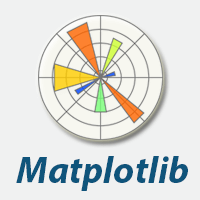
</div>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">


I. [Introduction](#0)<br>
    II. [Functionnal plotting](#1)<br>
    III. [OOP API method](#2)<br>
    IV. [Matplotlib with pandas](#3)<br>
    V. [Plotting time-series Data](#3)<br>
    </div>

### Matplotlib installation if not already installed

In [1]:
!pip3 install matplotlib # just run this cell

In [2]:
import numpy as np
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt

In [3]:
# only if using Jupyter notebook --> to see the plot inside jupyter and not outside
#%matplotlib inline

---
## I. Introduction <a id="0"></a>


**Matplotlib allows us to:**

* Generate plots, histograms, bar charts, scatter plots, ....

* The most powerful and custumomizable visualization library in python.

* Pandas has good interactions with visualization libraries such as Matplotlib.

## II. Functionnal plotting <a id="1"></a>

In this section, we'll plot straightforward no object definition before 

**Example 1: a single plot**

In [4]:
x = np.linspace(0,10,21)
y = x**3

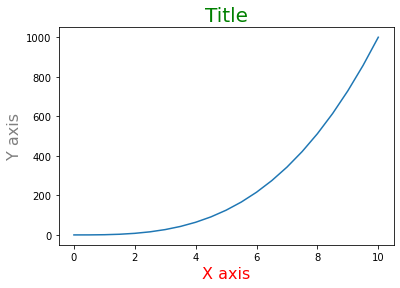

In [5]:
plt.plot(x,y)
plt.title('Title',size = 20, color = 'g') 
plt.ylabel('Y axis',size = 16, color = 'grey')
plt.xlabel('X axis',size = 16, color = 'r')
plt.show() # to use always inside python scripts , not neeeded here

**Example 2: with two plots**

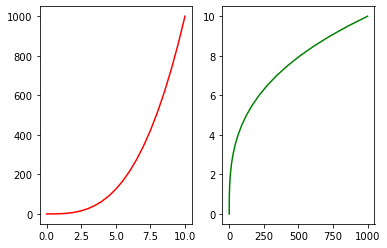

In [6]:
# First plot
plt.subplot(1, 2 , 1) # arguments, nrows, ncols, positions in subplots
plt.plot(x,y, color = 'r')

# Second plot
plt.subplot(1, 2 , 2) 
plt.plot(y,x, color = 'g')


## II. OOP plotting mehod <a id="2"></a>


In this section, we'll use matplotlib's API Object-Oriented-Programming method.

First, we intitalize our <code>figure</code> object and call methods and attributes from our Figure object.

**Example 3**

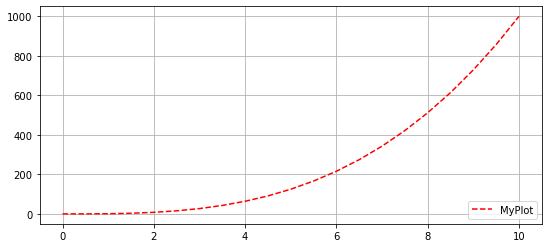

In [7]:
fig, ax = plt.subplots(figsize=(9,4)) # figsize to regulate height,length of plot
 
ax.plot(x,y,color = 'r', label = 'MyPlot', linestyle ='--')
ax.grid()
ax.legend(loc='lower right')

**Example 4**

**You can choose style from matplotlib styles**
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [8]:
from matplotlib import style
style.use('ggplot') # or ggplot as another style

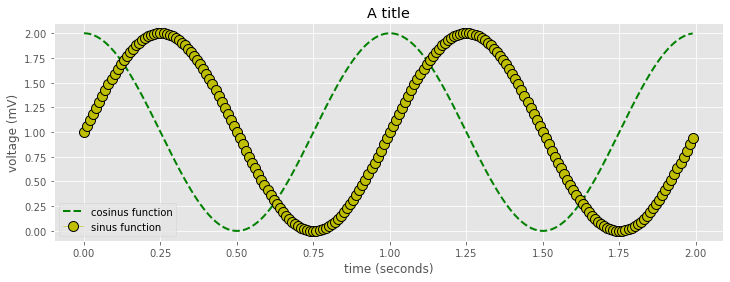

In [9]:
t = np.arange(0.0, 2.0, 0.01)
c = 1 + np.cos(2 * np.pi * t)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t, c, label = 'cosinus function', color = 'g', linestyle ='--', linewidth =2)
ax.plot(t, s, label = 'sinus function',
        marker ='o', markersize = 10, markeredgecolor = 'black',
        color ='y', linewidth = 0.5)

ax.set(xlabel='time (seconds)', ylabel='voltage (mV)',title='A title')
ax.legend(loc = 'lower left')

#fig.savefig("test.png") # OPEN YOUR DIRECTORY AND SEE YOUR PLOT AS A PNG
plt.show()

**Example 5: BarChart**

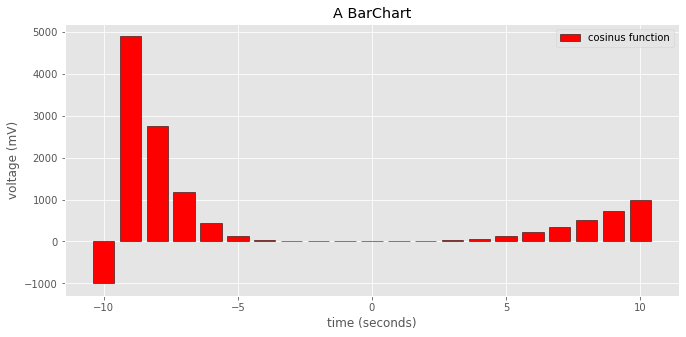

In [10]:

x = np.linspace(-10,10,21)
y = x**3 + +np.log(x+11)/np.exp(x) # some random function

fig, ax = plt.subplots(figsize=(11,5))
ax.bar(x, y, label = 'cosinus function', facecolor = 'r', edgecolor ='black')

ax.set(xlabel='time (seconds)', ylabel='voltage (mV)',title='A BarChart')
ax.legend(loc = 'upper right')

#fig.savefig("test.png") # OPEN YOUR DIRECTORY AND SEE YOUR PLOT AS A PNG
plt.show()

**Example 6: Histogram**

In [11]:
a=np.random.seed(102)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)

**Normal Distribution Formula**
$$
  \mu : mean; 
$$

$$
  \sigma : Standard Deviation; 
$$

<div>
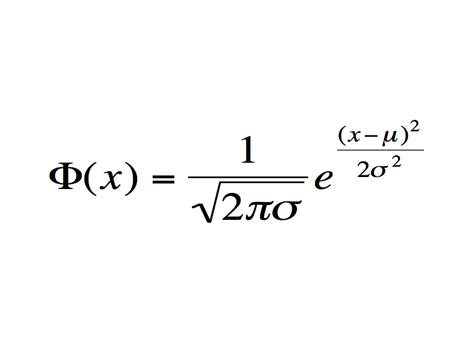
</div>

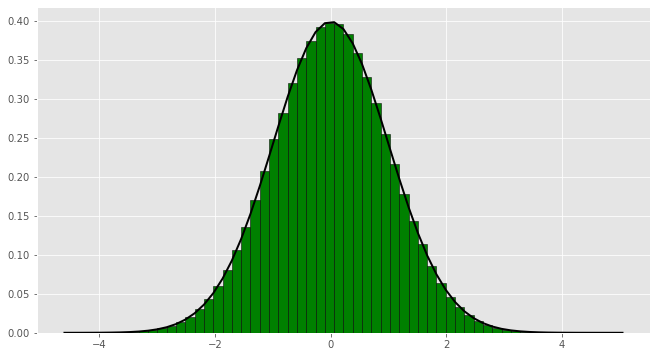

In [12]:
fig, ax = plt.subplots(figsize=(11,6))

count, bins, ignored = ax.hist(s, 60,edgecolor='black',color='g', density=True)
# with normal distribution formula

mu3, sigma3 = 0, 2 # mean and standard deviation

y=[1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ) for x in bins] #list comprehension
ax.plot(
    bins, y,linewidth=2, color='black'
        )

**You can customize the plot as you like**

## IV. Matplotlib with pandas <a id="3"></a>


Pandas integrates perfectly with matplotlib.

**let's read the containers dataset we have previously used**

In [13]:
filename = 'data_containers_troughput.csv'
df = pd.read_csv(filename,index_col=0, decimal=',')

# change columns names
df.columns = ['Containers Index', 'Import Freight Cost $']
df.head(3)

,Containers Index,Import Freight Cost $
Jan 2007,74.43,1050.13
Feb 2007,78.36,1011.25
Mar 2007,75.52,1167.35


**Plot first column as histogram**

In [14]:
from matplotlib import style
style.use('seaborn-bright')

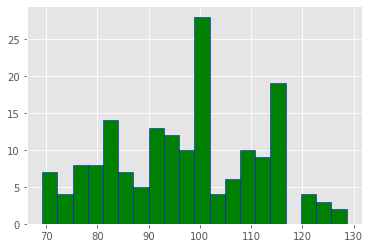

In [15]:
df['Containers Index'].hist(bins=20,facecolor='g', edgecolor='b')

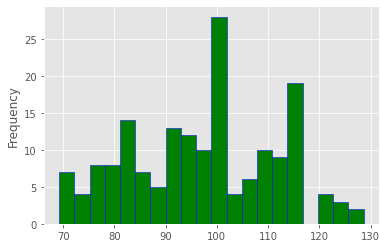

In [16]:
df['Containers Index'].plot(kind='hist',bins=20,facecolor='g', edgecolor='b') # same

**Plot dataframes values as area**

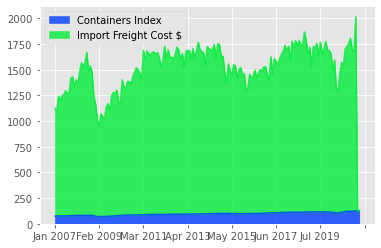

In [17]:
df.plot.area(alpha = 0.8)

**Plot bar chart**

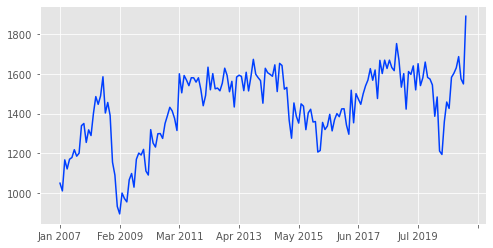

In [18]:
df['Import Freight Cost $'].plot.line(x=df.index,figsize=(8,4))

**Scatter Plot**

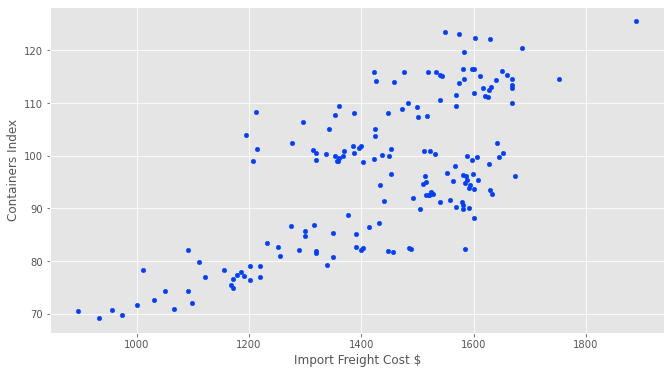

In [19]:
df.plot.scatter(x='Import Freight Cost $',y='Containers Index',figsize=(11,6))

Color points from a virtual third columns randominzed of integer values in [0,6]

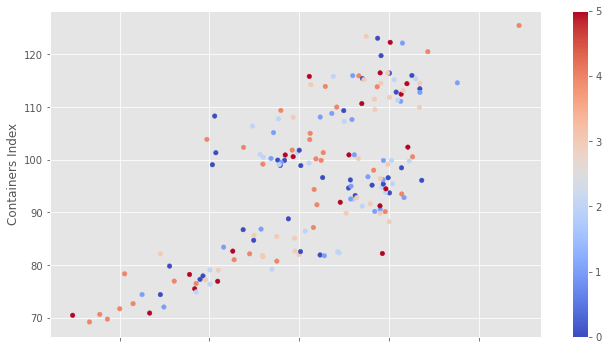

In [20]:
df.plot.scatter(x='Import Freight Cost $',y='Containers Index',
                c = np.random.randint(0,6,len(df)),
                cmap = 'coolwarm',
                figsize=(11,6))

Regulate size of points

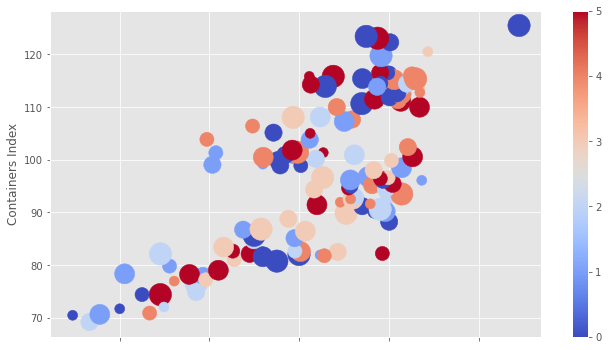

In [21]:
df.plot.scatter(x='Import Freight Cost $',y='Containers Index',
                c = np.random.randint(0,6,len(df)),
                s = 100*np.random.randint(0,6,len(df)),
                cmap = 'coolwarm',
                figsize=(11,6))

**Box plot with mean, min, max**

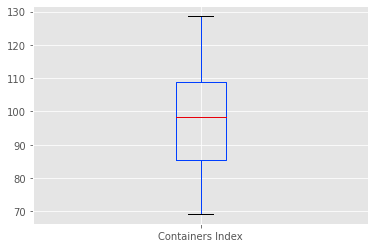

In [22]:
df['Containers Index'].plot.box()

### Let's consider another dataframe

In [23]:
arr = np.random.randn(1000,2) # 1000 random points 2D array
df2 = pd.DataFrame(arr,columns=['A','B'])
df2.head()

,A,B
0,-1.243986,0.198832
1,-0.216719,0.545039
2,0.976623,0.499988
3,-0.014098,-0.676131
4,0.038481,-0.285577


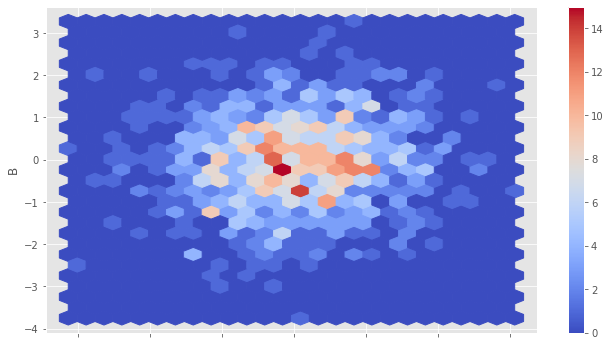

In [24]:
df2.plot.hexbin(x ='A', y='B',gridsize=25,figsize=(11,6),
               cmap ='coolwarm' # you can comment if you want this line
               ) 

**Kernel Density Estimation**

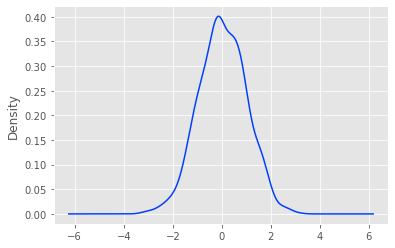

In [25]:
df2['A'].plot.kde()

## V. Plotting time-series Data <a id="4"></a>


Let's plot a time series from our previous containers dataframe

In [26]:
df.head()

,Containers Index,Import Freight Cost $
Jan 2007,74.43,1050.13
Feb 2007,78.36,1011.25
Mar 2007,75.52,1167.35
Apr 2007,76.98,1121.77
May 2007,76.53,1170.57


In [27]:
df.index = pd.to_datetime(df.index)
df.head(2)

,Containers Index,Import Freight Cost $
2007-01-01,74.43,1050.13
2007-02-01,78.36,1011.25


**We are plotting data evolution relative the the initial value in our dataset**

In order to see patterns and do some visual analysis

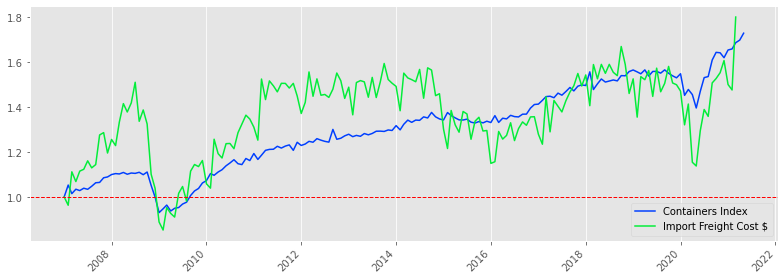

In [28]:
fig,ax = plt.subplots(figsize=(11,4))

#marker='o',markersize=5

for col in df.columns:
    ax.plot(df[col]/df[col].values[0],
            label = col
           )

ax.xaxis.grid(True)
ax.yaxis.grid(False)
ax.axhline(1, color = 'r', ls='--',lw=1) # add horizontal line at 1

ax.legend(loc='lower right')

fig.autofmt_xdate(rotation=45) # rotate xaxis labels
plt.tight_layout() # for better rendering

**What can you conclude from the previous plot ?**

<div class="alert alert-block alert-success">
<b>Bear in mind:</b> Choose Figure and axis to organize well your plots
</div>

# Great Job!